<a href="https://colab.research.google.com/github/adamlutzz/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/DS_Unit_1_Sprint_Challenge_3_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

## Load Dataset

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare

In [38]:
# Visualize data and see what I need

!curl https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data

b,30.83,0,u,g,w,v,1.25,t,t,01,f,g,00202,0,+
a,58.67,4.46,u,g,q,h,3.04,t,t,06,f,g,00043,560,+
a,24.50,0.5,u,g,q,h,1.5,t,f,0,f,g,00280,824,+
b,27.83,1.54,u,g,w,v,3.75,t,t,05,t,g,00100,3,+
b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
b,32.08,4,u,g,m,v,2.5,t,f,0,t,g,00360,0,+
b,33.17,1.04,u,g,r,h,6.5,t,f,0,t,g,00164,31285,+
a,22.92,11.585,u,g,cc,v,0.04,t,f,0,f,g,00080,1349,+
b,54.42,0.5,y,p,k,h,3.96,t,f,0,f,g,00180,314,+
b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+
b,22.08,0.83,u,g,c,h,2.165,f,f,0,t,g,00128,0,+
b,29.92,1.835,u,g,c,h,4.335,t,f,0,f,g,00260,200,+
a,38.25,6,u,g,k,v,1,t,f,0,t,g,00000,0,+
b,48.08,6.04,u,g,k,v,0.04,f,f,0,f,g,00000,2690,+
a,45.83,10.5,u,g,q,v,5,t,t,07,t,g,00000,0,+
b,36.67,4.415,y,p,k,v,0.25,t,t,10,t,g,00320,0,+
b,28.25,0.875,u,g,m,v,0.96,t,t,03,t,g,00396,0,+
a,23.25,5.875,u,g,q,v,3.17,t,t,10,f,g,00120,245,+
b,21.83,0.25,u,g,d,h,0.665,t,f,0,t,g,00000,0,+
a,19.17,8.585,u,g,cc,h,0.75,t,t,07,f,g,00096,0,+
b,25.00,11.25,u,g,c,v,2.5,t,t,17,f,g,00200,1208,+
b,23

In [39]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/credit.names

1. Title: Japanese Credit Screening (examples & domain theory)

2. Source information:
   -- Creators: Chiharu Sano 
   -- Donor: Chiharu Sano
             csano@bonnie.ICS.UCI.EDU
   -- Date: 3/19/92

3. Past usage: 
   -- None Published

4. Relevant information:
   --  Examples represent positive and negative instances of people who were and were not 
       granted credit.
   --  The theory was generated by talking to the individuals at a Japanese company that grants
       credit.

5. Number of instances: 125





In [40]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.names


1. Title: Credit Approval

2. Sources: 
    (confidential)
    Submitted by quinlan@cs.su.oz.au

3.  Past Usage:

    See Quinlan,
    * "Simplifying decision trees", Int J Man-Machine Studies 27,
      Dec 1987, pp. 221-234.
    * "C4.5: Programs for Machine Learning", Morgan Kaufmann, Oct 1992
  
4.  Relevant Information:

    This file concerns credit card applications.  All attribute names
    and values have been changed to meaningless symbols to protect
    confidentiality of the data.
  
    This dataset is interesting because there is a good mix of
    attributes -- continuous, nominal with small numbers of
    values, and nominal with larger numbers of values.  There
    are also a few missing values.
  
5.  Number of Instances: 690

6.  Number of Attributes: 15 + class attribute

7.  Attribute Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z

In [41]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/credit.lisp

;; positive examples represent people that were granted credit
(def-pred credit_screening :type (:person) 
  :pos
  ((s1) (s2) (s4) (s5) (s6) (s7) (s8) (s9) (s14) (s15) (s17) (s18) (s19)
   (s21) (s22) (s24) (s28) (s29) (s31) (s32) (s35) (s38) (s40) (s41)
   (s42) (s43) (s45) (s46) (s47) (s49) (s50) (s51) (s53) (s54) (s55)
   (s56) (s57) (s59) (s61) (s62) (s63) (s64) (s65) (s66) (s69) (s70)
   (s71) (s72) (s73) (s74) (s75) (s76) (s77) (s78) (s79) (s80) (s81)
   (s83) (s84) (s85) (s86) (s87) (s89) (s90) (s91) (s92) (s93) (s94)
   (s96) (s97) (s98) (s100) (s103) (s104) (s106) (s108) (s110) (s116)
   (s117) (s118) (s119) (s121) (s122) (s123) (s124))
  :neg
  ((s3) (s10) (s11) (s12) (s13) (s16) (s20) (s23) (s25) (s26) (s27) 
   (s30) (s33) (s34) (s36) (s37) (s39) (s44) (s48) (s52) (s58) (s60)
   (s67) (s68) (s82) (s88) (s95) (s99) (s101) (s102) (s105) (s107)
   (s109) (s111) (s112) (s113) (s114) (s115) (s120) (s125)))

(def-pred jobless :type (:person) :pos
  ((s3) (s10) (s12) (s23) (s34) 

In [51]:
# looks like crx.data is the one I need to use

df = pd.read_csv(link_1,header=None, na_values='?')
print(df.shape)
df.head()

(690, 16)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [52]:
df.describe()

,1,2,7,10,13,14
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [53]:
df.describe(exclude='number')

,0,3,4,5,6,8,9,11,12,15
count,678,684,684,681,681,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,468,519,519,137,399,361,395,374,625,383


In [54]:
df.dtypes

0      object
1     float64
2     float64
3      object
4      object
5      object
6      object
7     float64
8      object
9      object
10      int64
11     object
12     object
13    float64
14      int64
15     object
dtype: object

## Clean DataFrame

In [0]:
# lets name the columns to understand what is being compared

columns = {0:'a1', 1:'a2', 2:'a3', 3:'a4',
           4:'a5', 5:'a6', 6:'a7', 7:'a8',
           8:'a9', 9:'a10', 10:'a11', 11:'a12',
           12:'a13', 13:'a14', 14:'a15', 15:'a16'}

In [56]:
df = df.rename(columns=columns)
df.head()

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [57]:
df.dtypes

a1      object
a2     float64
a3     float64
a4      object
a5      object
a6      object
a7      object
a8     float64
a9      object
a10     object
a11      int64
a12     object
a13     object
a14    float64
a15      int64
a16     object
dtype: object

In [58]:
# columns a2, a11, a15 do not have the correct data type and need to be corrected

df['a2'] = df['a2'].astype(float)
df.dtypes

a1      object
a2     float64
a3     float64
a4      object
a5      object
a6      object
a7      object
a8     float64
a9      object
a10     object
a11      int64
a12     object
a13     object
a14    float64
a15      int64
a16     object
dtype: object

In [61]:
df['a11'] = df['a11'].astype(float)
df.dtypes

a1      object
a2     float64
a3     float64
a4      object
a5      object
a6      object
a7      object
a8     float64
a9      object
a10     object
a11    float64
a12     object
a13     object
a14    float64
a15      int64
a16     object
dtype: object

In [62]:
df['a15'] = df['a15'].astype(float)
df.dtypes

a1      object
a2     float64
a3     float64
a4      object
a5      object
a6      object
a7      object
a8     float64
a9      object
a10     object
a11    float64
a12     object
a13     object
a14    float64
a15    float64
a16     object
dtype: object

In [63]:
df.isna().sum()

a1     12
a2     12
a3      0
a4      6
a5      6
a6      9
a7      9
a8      0
a9      0
a10     0
a11     0
a12     0
a13     0
a14    13
a15     0
a16     0
dtype: int64

In [64]:
df['a1'].value_counts()

b    468
a    210
Name: a1, dtype: int64

In [74]:
df['a4'].value_counts()

u    519
y    163
l      2
Name: a4, dtype: int64

In [0]:
# In order to fill each column with their same datatype I will just use an ffill

df = df.fillna(method='ffill')

In [76]:
df.isna().sum()

a1     0
a2     0
a3     0
a4     0
a5     0
a6     0
a7     0
a8     0
a9     0
a10    0
a11    0
a12    0
a13    0
a14    0
a15    0
a16    0
dtype: int64

In [77]:
df.dtypes

a1      object
a2     float64
a3     float64
a4      object
a5      object
a6      object
a7      object
a8     float64
a9      object
a10     object
a11    float64
a12     object
a13     object
a14    float64
a15    float64
a16     object
dtype: object

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [0]:
import seaborn as sns
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

In [84]:
# split up floats and objects for visualization
df.dtypes

a1      object
a2     float64
a3     float64
a4      object
a5      object
a6      object
a7      object
a8     float64
a9      object
a10     object
a11    float64
a12     object
a13     object
a14    float64
a15    float64
a16     object
dtype: object

In [83]:
# objects

df_object = df[['a1', 'a4', 'a5', 'a6', 'a7', 'a9', 'a10', 'a12', 'a13', 'a16']]
df_object.head()

,a1,a4,a5,a6,a7,a9,a10,a12,a13,a16
0,b,u,g,w,v,t,t,f,g,+
1,a,u,g,q,h,t,t,f,g,+
2,a,u,g,q,h,t,f,f,g,+
3,b,u,g,w,v,t,t,t,g,+
4,b,u,g,w,v,t,f,f,s,+


In [85]:
# Floats

df_cont = df[['a2', 'a3', 'a8', 'a11', 'a14', 'a15']]
df_cont.head()

,a2,a3,a8,a11,a14,a15
0,30.83,0.000,1.25,1.0,202.0,0.0
1,58.67,4.460,3.04,6.0,43.0,560.0
2,24.50,0.500,1.50,0.0,280.0,824.0
3,27.83,1.540,3.75,5.0,100.0,3.0
4,20.17,5.625,1.71,0.0,120.0,0.0


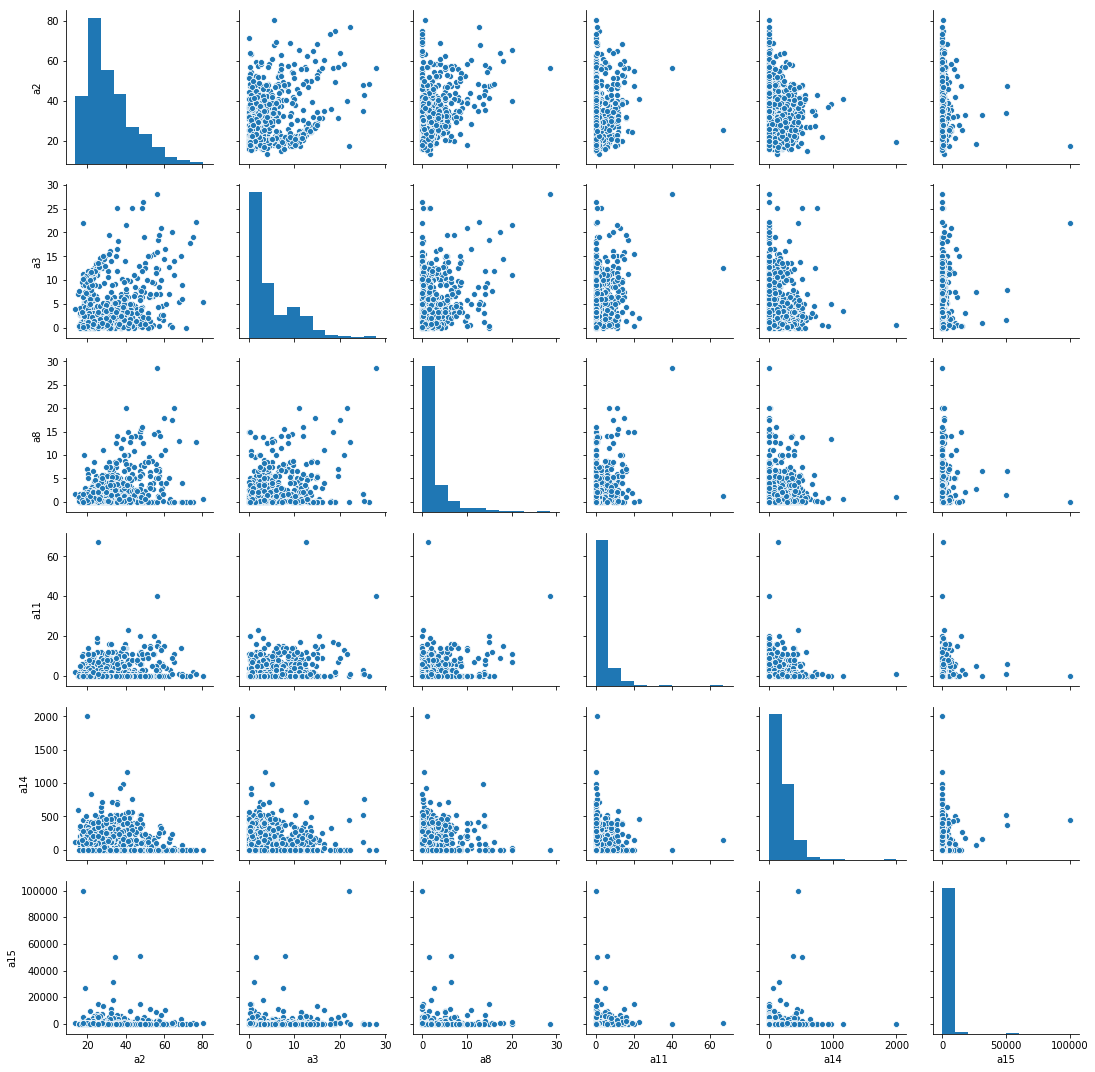

In [88]:
sns.pairplot(df_cont)

In [94]:
# make a dataframe for + and -

plus = df.loc[df['a16'] == '+']
minus = df.loc[df['a16'] == '-']

plus.head()

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202.0,0.0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,+


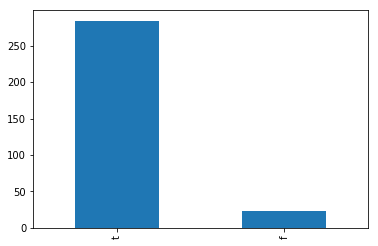

In [134]:
# a9 is our winner

plus['a9'].value_counts().plot(kind='bar')
# minus['a9'].value_counts().plot(kind='bar')
plt.show()

In [119]:
# detemine lengths of each categorical feature

for col in df_object.columns:
  n = len(df_object[col].unique())
  print(f'{col}'' n=',n)

a1 n= 2
a4 n= 3
a5 n= 3
a6 n= 14
a7 n= 9
a9 n= 2
a10 n= 2
a12 n= 2
a13 n= 3
a16 n= 2


In [0]:
import scipy.stats as stats

In [0]:
# Null hypothesis function for loop

def null_hypothesis_outcome(p_value):
  if p_value <= 0.05:
    return('Reject Null Hypothesis')
  else:
    return('Fail to Reject Null Hypothesis')

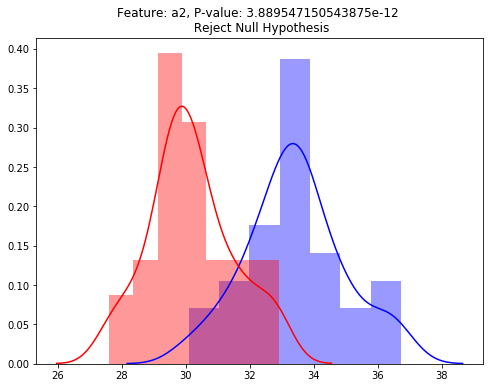

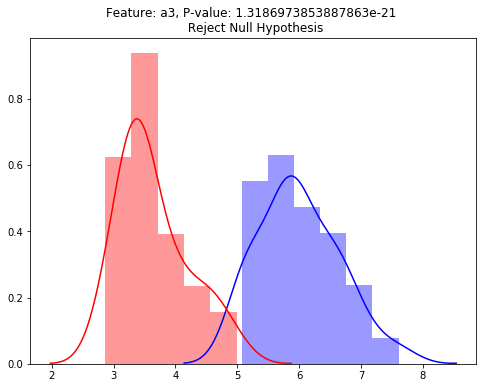

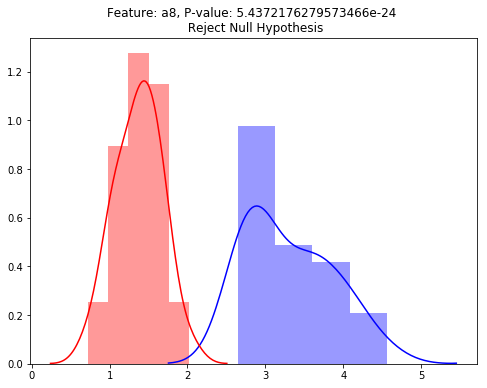

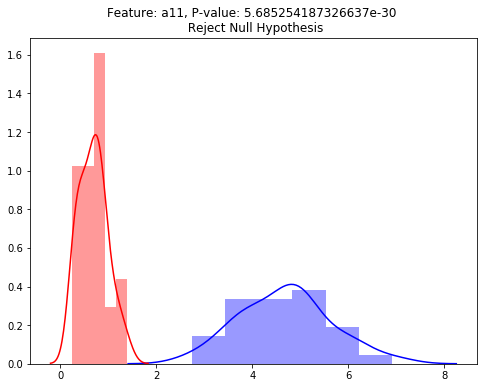

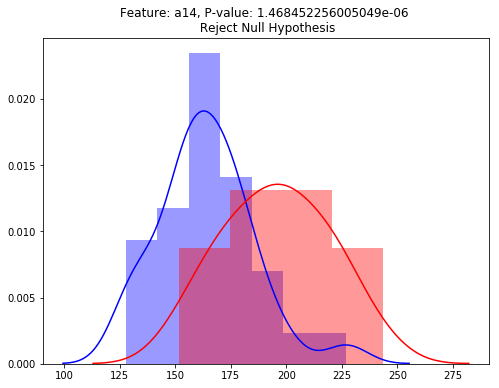

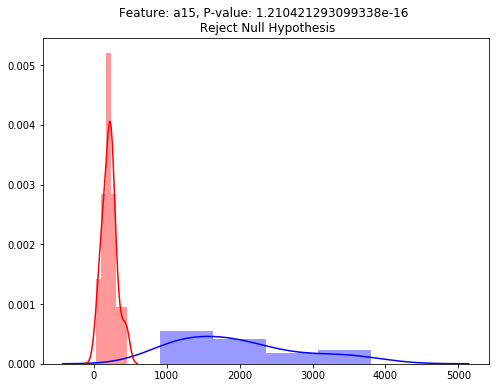

In [113]:
# ttest loop for all continuous variables in df

for col in df_cont.columns:
    mean_plus = []
    mean_minus = []
    for i in range(30):
      # Randomly sample 50 Democrats and Republicans for each issue
      mean_plus.append(plus[col].sample(50).mean())
      mean_minus.append(minus[col].sample(50).mean())
    
    # Plot Distribution
    plt.figure(figsize =(8,6))
    sns.distplot(mean_plus, color='b')
    sns.distplot(mean_minus, color='r')
    
    # Run t-test
    stat, pvalue = ttest_ind(mean_plus, mean_minus)
    null_hyp_outcome = null_hypothesis_outcome(pvalue)
    
    # Plot
    plt.title(f'Feature: {col}, P-value: {pvalue} \n {null_hyp_outcome}');
    plt.show

In [188]:
# conduct chi-square test
# sort column a6
df = df.sort_values(by='a9', ascending=True)
contingency_table = pd.crosstab(df['a16'], df['a6'])
contingency_table

a6,aa,c,cc,d,e,ff,i,j,k,m,q,r,w,x
a16,,,,,,,,,,,,,,
+,19,64,29,7,14,7,14,3,14,16,53,2,33,32
-,35,75,12,23,11,46,47,7,38,22,27,1,33,6


In [189]:
row_sums = np.array(contingency_table.sum(axis=1))
col_sums = np.array(contingency_table.sum())

print(row_sums)
print(col_sums)
print(row_sums.sum() + col_sums.sum())

[307 383]
[ 54 139  41  30  25  53  61  10  52  38  80   3  66  38]
1380


In [190]:
# total

total = row_sums.sum() + col_sums.sum()
total

1380

In [191]:
# create expected range

expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  
expected = np.array(expected)
print(expected.shape)
print(expected)

(2, 14)
[[12.01304348 30.92246377  9.12101449  6.67391304  5.5615942  11.79057971
  13.57028986  2.22463768 11.56811594  8.45362319 17.79710145  0.6673913
  14.6826087   8.45362319]
 [14.98695652 38.57753623 11.37898551  8.32608696  6.9384058  14.70942029
  16.92971014  2.77536232 14.43188406 10.54637681 22.20289855  0.8326087
  18.3173913  10.54637681]]


In [192]:
observed = pd.crosstab(df['a16'], df['a6']).values
print(observed.shape)
print(observed)

(2, 14)
[[19 64 29  7 14  7 14  3 14 16 53  2 33 32]
 [35 75 12 23 11 46 47  7 38 22 27  1 33  6]]


In [202]:
chi_square = ((observed - expected)**2/(expected)).sum()
chi_square

9.191570451545383

In [203]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)
print(chi_squared, p_value, dof, expected)

9.191570451545383 0.010094291370456362 2 [[278.07971014   3.55942029  25.36086957]
 [346.92028986   4.44057971  31.63913043]]


In [208]:
# for loop to determine all chi-squared values

for col in df_object.columns[:-1]:
  
  # build cross-tab
  df = df.sort_values(by='a9', ascending=True)
  contingency_table = pd.crosstab(df['a16'], df[col])
  contingency_table

  # gather row/column sums
  row_sums = np.array(contingency_table.sum(axis=1))
  col_sums = np.array(contingency_table.sum())

  # gather total
  total = row_sums.sum() + col_sums.sum()
  
  # loop for expected values
  expected = []
  for i in range(len(row_sums)):
    expected_row = []
    for column in col_sums:
      expected_val = column*row_sums[i]/total
      expected_row.append(expected_val)
    expected.append(expected_row)
  
  expected = np.array(expected)

  observed = pd.crosstab(df['a16'], df[col]).values
  
  # chi-squared formula
  chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)
  
  # results
  print(f'{col} chi-squared value:', f'{chi_squared:.3f}')
  print(f'{col} p-value:', f'{p_value:}')

a1 chi-squared value: 0.504
a1 p-value: 0.47786776443128076
a4 chi-squared value: 27.382
a4 p-value: 1.1326171463492892e-06
a5 chi-squared value: 27.382
a5 p-value: 1.1326171463492892e-06
a6 chi-squared value: 101.157
a6 p-value: 9.895986843584472e-16
a7 chi-squared value: 47.135
a7 p-value: 1.445357273081106e-07
a9 chi-squared value: 355.204
a9 p-value: 3.1185900878457007e-79
a10 chi-squared value: 143.070
a10 p-value: 5.675727374527571e-33
a12 chi-squared value: 0.568
a12 p-value: 0.45094587758631943
a13 chi-squared value: 9.192
a13 p-value: 0.010094291370456362


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

## T-test interpretation

The t-test run for feature a11 indicates that the '-' class had a very narrow distribution, while the '+' class had a much wider distribution.

<function matplotlib.pyplot.show>

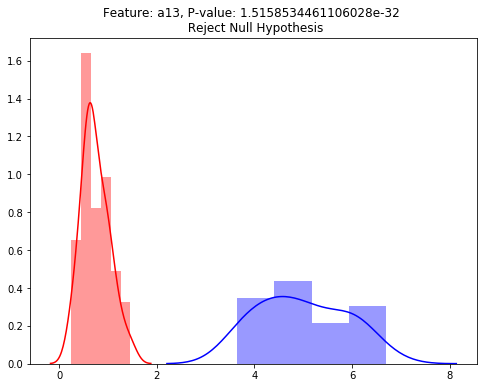

In [180]:
np.random.seed(10)

# Get Sample for specific feature
mean_plus = []
mean_minus = []
for i in range(30):
  # sample + and - for col a11
  mean_plus.append(plus['a11'].sample(50).mean())
  mean_minus.append(minus['a11'].sample(50).mean())
    
# Plot Distribution
plt.figure(figsize =(8,6))
sns.distplot(mean_plus, color='b')
sns.distplot(mean_minus, color='r')
    
# Run t-test
stat, pvalue = ttest_ind(mean_plus, mean_minus)
null_hyp_outcome = null_hypothesis_outcome(pvalue)
    
# Plot
plt.title(f'Feature: {col}, P-value: {pvalue} \n {null_hyp_outcome}');
plt.show

The t-test run for feature a2 shows that this feature, while coming from statistically different samples, both have a similar distribution of values.

<function matplotlib.pyplot.show>

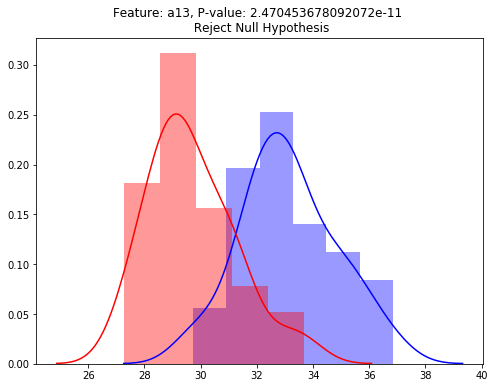

In [185]:
np.random.seed(5)

# Get Sample for specific feature
mean_plus = []
mean_minus = []
for i in range(30):
  # sample + and - for col a11
  mean_plus.append(plus['a2'].sample(50).mean())
  mean_minus.append(minus['a2'].sample(50).mean())
    
# Plot Distribution
plt.figure(figsize =(8,6))
sns.distplot(mean_plus, color='b')
sns.distplot(mean_minus, color='r')
    
# Run t-test
stat, pvalue = ttest_ind(mean_plus, mean_minus)
null_hyp_outcome = null_hypothesis_outcome(pvalue)
    
# Plot
plt.title(f'Feature: {col}, P-value: {pvalue} \n {null_hyp_outcome}');
plt.show

## Chi-Squared interpretation


The Chi-squared test from feature a9 had the largest chi-squared value at 355.204 and p-value of 3.1185900878457007e-79 <br/>

This means that it we must reject the null hypothesis that a11 and a16 are independent of each other. 

Ran out of time feels bad :(